##**Dimensionality Reduction Techniques**

##**Image Dataset**

#**PCA Dimensionality Reduction**

Steps followed are:

Applied PCA on the image matrix to reduce the dimensionality to a smaller number of principal components (PCs). 

It is a lossy compression as some of teh information is discarded.

Based on how much visual information we retained, reconstructed the image from the limited number of PC.

Reconstructed images are different number of selected components and visualize the outcomes.

##**Imported the requied libraries**

In [ ]:
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt

##**Mounted the Google drive where the image has been stored**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##**Getting the image and plotting it to visualize the image**

(3456, 4608, 3)


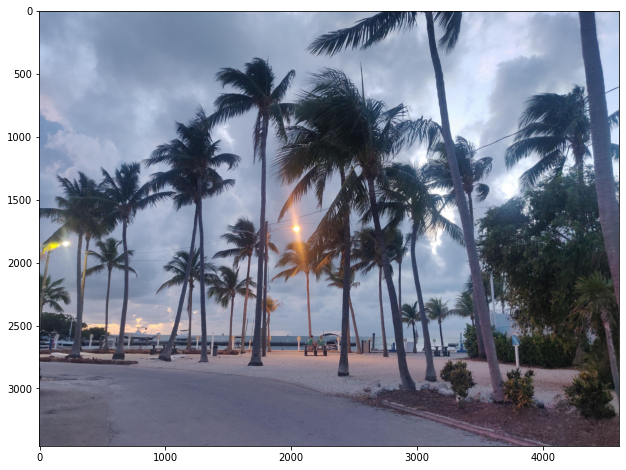

In [ ]:
image_raw = imread("/content/drive/MyDrive/DataMining/Assignment2/image.jpg")
print(image_raw.shape)

# Displaying the image
plt.figure(figsize=[12,8])
plt.imshow(image_raw)

**The image is a color image and the shape of the image is (3456, 4608, 3) as we can see above.**

**I will be converting the image to Black & White (greyscale).**

**Steps for converting image to greyscale:**

*   Summing RGBs channel values for each pixel
*   Capping values to 1
*   Plotting the matrix as a greyscale image.


(3456, 4608)
1.0


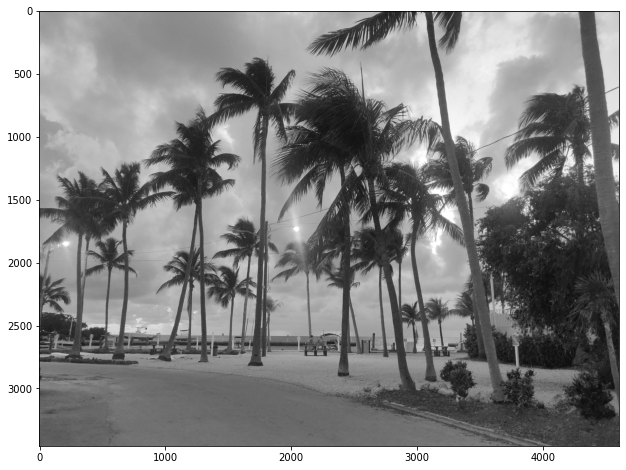

In [ ]:
image_sum = image_raw.sum(axis=2)
print(image_sum.shape)

image_bw = image_sum/image_sum.max()
print(image_bw.max())

plt.figure(figsize=[12,8])
plt.imshow(image_bw, cmap=plt.cm.gray)

##**Performing PCA on the image**

Performing PCA on the matrix with all the components

Visualizing how many components we could retain and how much cumulative variance they capture

Picking a suitable number of components to represent the image for compression

Number of components explaining 95% variance: 136


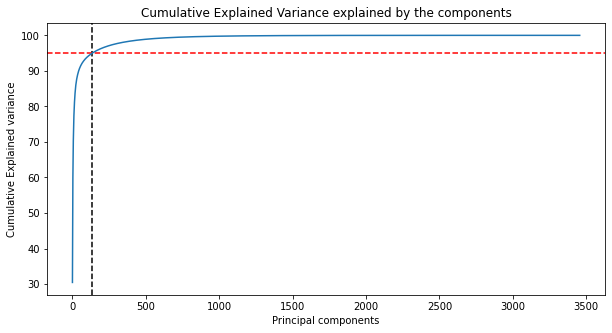

In [ ]:
from sklearn.decomposition import PCA, IncrementalPCA
pca = PCA()
pca.fit(image_bw)

# Getting the cumulative variance

var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

# How many PCs explain 95% of the variance?
k = np.argmax(var_cumu>95)
print("Number of components explaining 95% variance: "+ str(k))
#print("\n")

plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by the components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
ax = plt.plot(var_cumu)

Looks like 136 components, instead of 3456 pixels, can explain 95% of the variance in the image!

Reconstructing the image using only 136 components and finding out if the reconstructed image is visually very different from the original.

Steps to reconstruct image:

*   Using the fit_transform method from the IncrementalPCA module
*   Find the 136 Principal components and transform and represent the data in those 136 new components/columns.
*   Reconstructing the original matrix from these 136 components using the inverse_transform method.
*   Plotting the image to visually assess the quality of it.

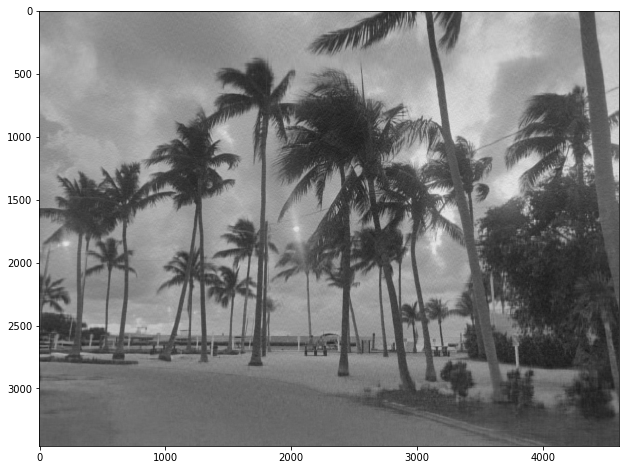

In [ ]:
ipca = IncrementalPCA(n_components=k)
image_recon = ipca.inverse_transform(ipca.fit_transform(image_bw))

# Plotting the reconstructed image
plt.figure(figsize=[12,8])
plt.imshow(image_recon,cmap = plt.cm.gray)

We can notice from above visualization that for 95% variance, the image should be more clearer image. Though we got all the major elements captured and we can still very well identify objects.

The clarity is missing which is the finer details in the visuals that make an image appealing and clear.

Using a different value of k - 600 components

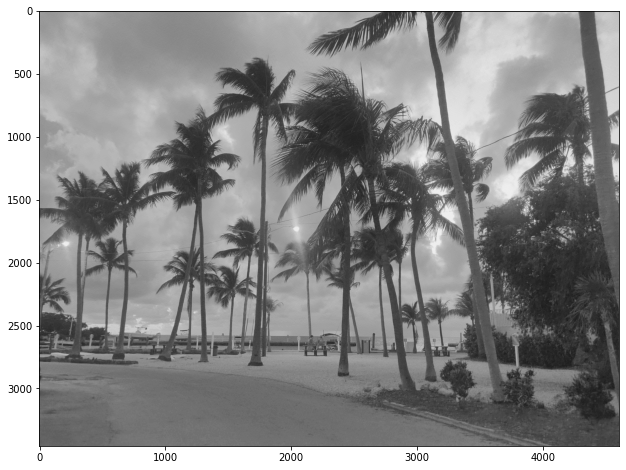

In [ ]:
# Function to reconstruct and plot image for a given number of components

def plot_at_k(k):
    ipca = IncrementalPCA(n_components=k)
    image_recon = ipca.inverse_transform(ipca.fit_transform(image_bw))
    plt.imshow(image_recon,cmap = plt.cm.gray)
    

k = 600
plt.figure(figsize=[12,8])
plot_at_k(550)

The image looks much better now.On a smaller resolution, it is not easy to detect the differences from the original greyscale image very easily.

Reconstructing and plotting for different number of components

Trying out different number of components, begining from 10, ending at 250
we'll reconstruct the image at each k and plot the images

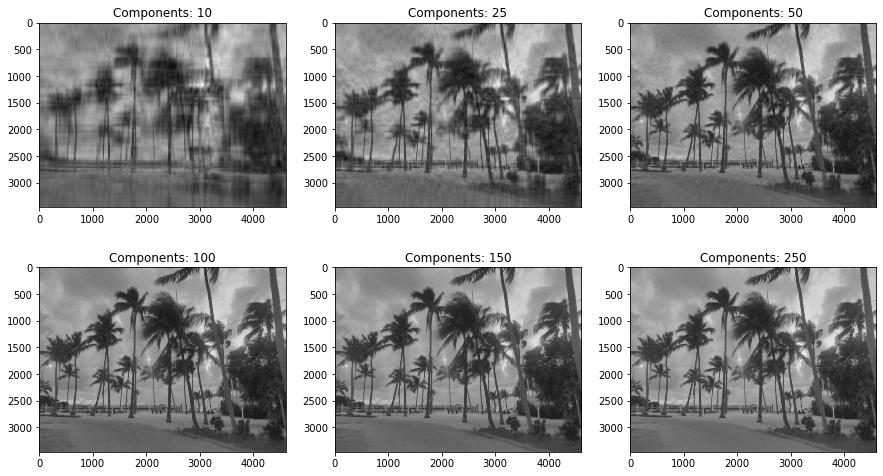

In [ ]:
ks = [10, 25, 50, 100, 150, 250]

plt.figure(figsize=[15,9])

for i in range(6):
    plt.subplot(2,3,i+1)
    plot_at_k(ks[i])
    plt.title("Components: "+str(ks[i]))

plt.subplots_adjust(wspace=0.2, hspace=0.0)
plt.show()

**As we can notice from the above outcomes that after 250, most of the reconstructed images are indistinguishable from the original greyscale.**

**Even 600 components instead of 3456 columns is a significant compression.**

#**SVD Dimensionality Reduction**

Now we will explore how to apply Singular Value Decomposition of a matrix to the problem of image compression. SVD decomposes a rectangular matrix $M$ to a three parts. $M=U\Sigma V^T$ -

$U$ - matrix of left singular vectors in the columns
$\Sigma$ - diagonal matrix with singular values
$V$ - matrix of right singular vectors in the columns
SVD in effect involves reconstructing the original matrix as a linear combination of several rank one matrices. A rank one matrix can be expressed as a outer product of two column vectors.

$M=\sigma_1u_1v_1^T+\sigma_2u_2v_2^T+\sigma_3u_3v_3^T+\sigma_3u_3v_3^T+....$ . A matrix of rank r will have r terms of these.

Here $\sigma_1,\sigma_2,\sigma_3 ...$ are singular values. $u_1,u_2,u_3 ...$ and $v_1,v_2,v_3 ...$ are left and right singular vectors respectively.

Image compression using SVD involves taking advantage of the fact that very few of the singular values are large. Although images from the real world are of full rank, they have low effective rank which means that only few of the singular values of the SVD of images will be large.

##**Importing the required libraries**

In [ ]:
from skimage import data
from skimage.color import rgb2gray

##**Imported libraries skimage and the list of images from them**

**Python. skimage has a module called data which makes available a set of images for exploration. We will load some images and convert them into a gray scale format**

In [ ]:
from skimage import img_as_ubyte,img_as_float
gray_images = {
        "clock":rgb2gray(img_as_float(data.clock())),
        "coffee":rgb2gray(img_as_float(data.coffee())),
        "horse":data.horse(),
        "brick":data.brick(),
        "cell":data.cell()
}

In [ ]:
image_bw

array([[0.60915033, 0.61699346, 0.6248366 , ..., 0.78562092, 0.78169935,
        0.77777778],
       [0.6130719 , 0.6130719 , 0.6130719 , ..., 0.78562092, 0.78169935,
        0.77777778],
       [0.6130719 , 0.60915033, 0.60522876, ..., 0.78562092, 0.78169935,
        0.77385621],
       ...,
       [0.37647059, 0.37647059, 0.38039216, ..., 0.35424837, 0.38169935,
        0.31111111],
       [0.40392157, 0.38823529, 0.38039216, ..., 0.32287582, 0.36601307,
        0.30718954],
       [0.39607843, 0.36862745, 0.35294118, ..., 0.27189542, 0.33856209,
        0.30718954]])

##**Using numpy.linalg for importing svd**

In [ ]:
from numpy.linalg import svd

In [ ]:
def compress_svd(image,k):
    """
    Perform svd decomposition and truncated (using k singular values/vectors) reconstruction
    returns
    --------
      reconstructed matrix reconst_matrix, array of singular values s
    """
    U,s,V = svd(image,full_matrices=False)
    reconst_matrix = np.dot(U[:,:k],np.dot(np.diag(s[:k]),V[:k,:]))
   
    return reconst_matrix,s

###**Compressing the gray scale images**

**Compressing and displaying the reconstructed images.**

**Displaying a plot of singular values**

In [ ]:

def compress_show_gray_images(img_name,k):
    
    image=gray_images[img_name]
    original_shape = image.shape
    reconst_img,s = compress_svd(image,k)
    fig,axes = plt.subplots(1,2,figsize=(8,5))
    axes[0].plot(s)
    compression_ratio =100.0* (k*(original_shape[0] + original_shape[1])+k)/(original_shape[0]*original_shape[1])
    axes[1].set_title("compression ratio={:.2f}".format(compression_ratio)+"%")
    axes[1].imshow(reconst_img,cmap='gray')
    axes[1].axis('off')
    fig.tight_layout()

###**Visualization**

**Created an interactive widget to explore how the quality of the reconstructed image varies with k.**

In [ ]:
from ipywidgets import interact,interactive,interact_manual
interact(compress_show_gray_images,img_name=list(gray_images.keys()),k=(1,300));

interactive(children=(Dropdown(description='img_name', options=('clock', 'coffee', 'horse', 'brick', 'cell'), …

##**Compress Color Image**

Color images are represented in python as 3 dimensional numpy arrays — the third dimension to represent the color values (red,green blue). However, svd method is applicable to two dimensional matrices. There are two ways to do it

*   Reshape Method
*   Layer Method

Followed the below steps:

*   Converted the 3 dimensional array to 2 dimensional arrays
*   Applied svd and reconstructed it back as a 3 dimensional array .


###**Reshape Method for the conversion**

Flatten the third dimension of the image array into the second dimension using numpy’s reshape method

In [ ]:
color_images = {
    "cat":img_as_float(data.chelsea()),
    "astro":img_as_float(data.astronaut()),
    "coffee":img_as_float(data.coffee())
    
}


**The svd decomposition is applied on the resulting reshaped array and reconstructed with the desired number of singular values/vectors.**

**The image array is reshaped back to the three dimensions by another call to reshape method.**

In [ ]:
def compress_show_color_images_reshape(img_name,k):
    """
     compress and display the reconstructed color image using the reshape method 
    """
    image = color_images[img_name]
    original_shape = image.shape
    image_reshaped = image.reshape((original_shape[0],original_shape[1]*3))
    image_reconst,_ = compress_svd(image_reshaped,k)
    image_reconst = image_reconst.reshape(original_shape)
    compression_ratio =100.0* (k*(original_shape[0] + 3*original_shape[1])+k)/(original_shape[0]*original_shape[1]*original_shape[2])
    plt.title("compression ratio={:.2f}".format(compression_ratio)+"%")
    plt.imshow(image_reconst)

###**The interactive widget to explore image compression of color images using the reshape method**

In [ ]:
interact(compress_show_color_images_reshape,img_name=list(color_images.keys()),k=(0,512));

interactive(children=(Dropdown(description='img_name', options=('cat', 'astro', 'coffee'), value='cat'), IntSl…

###**Layer Method for Color Image Compression**

**Color image is considered as a stack of 3 seperate two dimensional images (Red,blue and green layers).**

**Svd reconstruction applied on each two dimensional layer seperately.**

In [ ]:
def compress_show_color_images_layer(img_name,k):
    """
     compress and display the reconstructed color image using the layer method 
    """
    image = color_images[img_name]
    original_shape = image.shape
    image_reconst_layers = [compress_svd(image[:,:,i],k)[0] for i in range(3)]
    image_reconst = np.zeros(image.shape)
    for i in range(3):
        image_reconst[:,:,i] = image_reconst_layers[i]
    
    compression_ratio =100.0*3* (k*(original_shape[0] + original_shape[1])+k)/(original_shape[0]*original_shape[1]*original_shape[2])
    plt.title("compression ratio={:.2f}".format(compression_ratio)+"%")
    
    plt.imshow(image_reconst)

###**The interactive widget to explore image compression of color images using the reshape method**

In [ ]:
interact(compress_show_color_images_layer,img_name=list(color_images.keys()),k=(1,550));

interactive(children=(Dropdown(description='img_name', options=('cat', 'astro', 'coffee'), value='cat'), IntSl…

#**T-SNE Dimensionality Reduction**

tSNE tries to reduce dimension by preserving the neighborhood.

If we are taking a point a, in the original dimension (50 Features) and my closest neighbors were b,c,d,e,f. In the lower dimension also my closest neghbors should be b,c,d,e,f (2 Featurs).

This simmilarity between the neighbors are measured by KL Divergence.

###**Importing the required libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
colors = ['royalblue','red','deeppink', 'maroon', 'mediumorchid', 'tan', 'forestgreen', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

###**Importing Image**

**Importing make_circles image from the sklearn.datasets library**

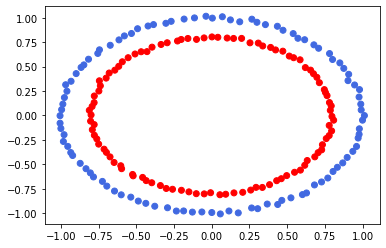

In [ ]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=200, noise=0.01)
plt.scatter(X[:,0], X[:,1],c=vectorizer(y))

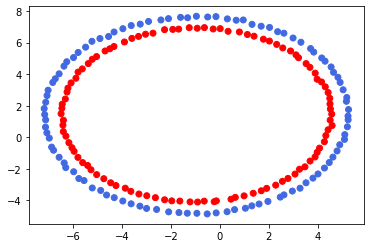

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2,perplexity=40, random_state=42)
X_reduced_tsne = tsne.fit_transform(X)
plt.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1],c=vectorizer(y))

**Findind for different perplexity with number of components as 2**

In [ ]:
tsne = TSNE(n_components=2,perplexity=5, random_state=42)
X_5 = tsne.fit_transform(X)
tsne = TSNE(n_components=2,perplexity=30, random_state=42)
X_30 = tsne.fit_transform(X)
tsne = TSNE(n_components=2,perplexity=40, random_state=42)
X_40 = tsne.fit_transform(X)
tsne = TSNE(n_components=2,perplexity=100, random_state=42)
X_100 = tsne.fit_transform(X)

In [ ]:
tsne = TSNE(n_components=2,perplexity=5, random_state=42)
X_5 = tsne.fit_transform(X)
tsne = TSNE(n_components=2,perplexity=30, random_state=42)
X_30 = tsne.fit_transform(X)
tsne = TSNE(n_components=2,perplexity=40, random_state=42)
X_40 = tsne.fit_transform(X)
tsne = TSNE(n_components=2,perplexity=100, random_state=42)
X_100 = tsne.fit_transform(X)

###**Visualiation**

**Plotting the circles with different perplexity outcomes**

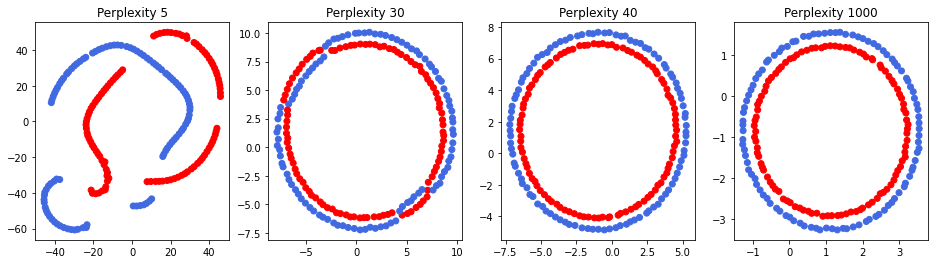

In [ ]:
plt.figure(figsize=(16, 4))
plt.subplot(141)
plt.gca().set_title('Perplexity 5')
plt.scatter(X_5[:,0], X_5[:,1],c=vectorizer(y))
plt.subplot(142)
plt.gca().set_title('Perplexity 30')
plt.scatter(X_30[:,0], X_30[:,1],c=vectorizer(y))
plt.subplot(143)
plt.gca().set_title('Perplexity 40')
plt.scatter(X_40[:,0], X_40[:,1],c=vectorizer(y))
plt.subplot(144)
plt.gca().set_title('Perplexity 1000')
plt.scatter(X_100[:,0], X_100[:,1],c=vectorizer(y))

##**Performing tSNE and PCA in MNIST**

In [ ]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [ ]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
print(X.shape, y.shape)

(70000, 784) (70000,)


In [ ]:
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df['y'] = y
df['label'] = df['y'].apply(lambda i: str(i))
X, y = None, None
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 786)


In [ ]:
# For reproducability of the results
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

<Figure size 432x288 with 0 Axes>

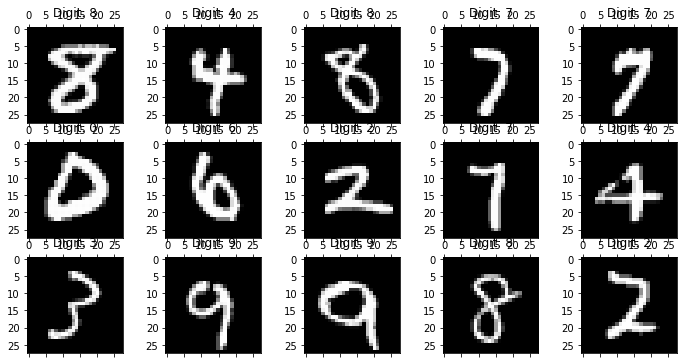

In [ ]:
plt.gray()
fig = plt.figure( figsize=(12,6) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'label'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

In [ ]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[feat_cols].values)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.09746116 0.07155445 0.06149531]


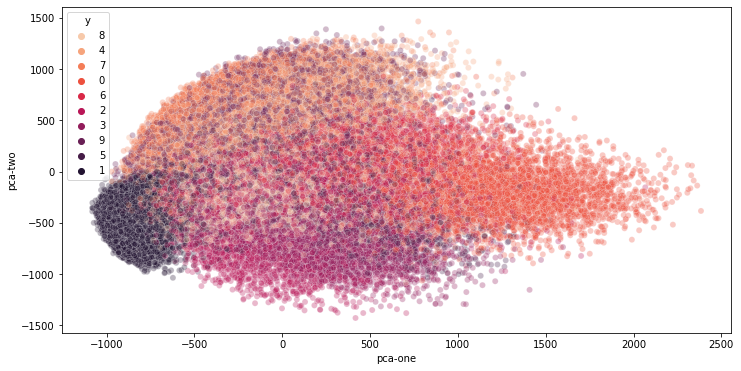

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("rocket_r", 10),
    data=df.loc[rndperm,:],
    legend="full",
    alpha=0.3
)

From the graph we can see the two components definitely hold some information, especially for specific digits, but clearly not enough to set all of them apart.

In [ ]:
#t-sne
N = 10000
df_subset = df.loc[rndperm[:N],:].copy()
data_subset = df_subset[feat_cols].values
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset)
df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1] 
df_subset['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.09819946 0.07123677 0.06113222]


In [ ]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 1.556s...
[t-SNE] Computed neighbors for 10000 samples in 177.036s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 438.329018
[t-SNE] KL divergence after 250 iterations with early exaggeration: 86.306229
[t-SNE] KL divergence after 300 iterations: 2.830281
t-SNE done! Time elap

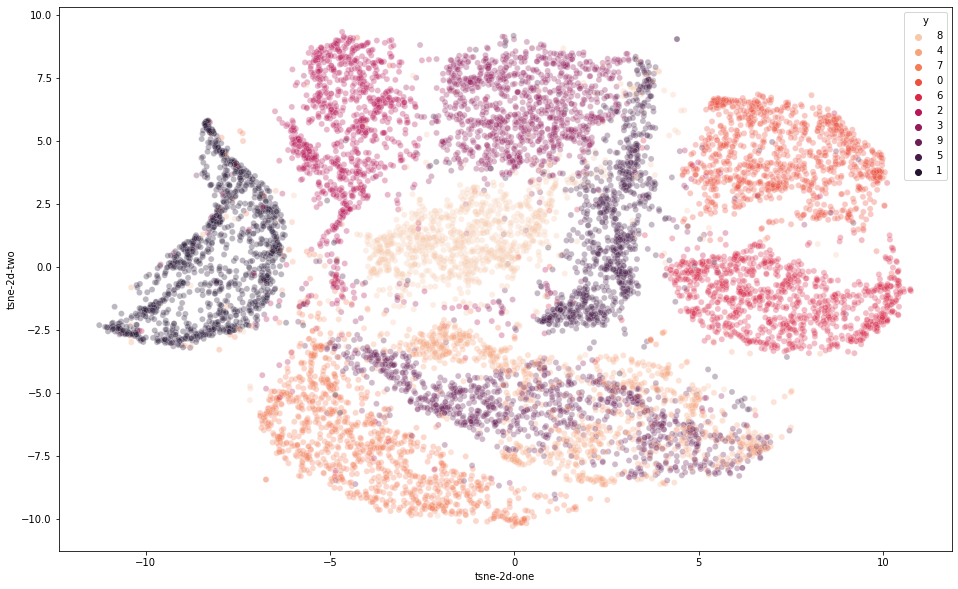

In [ ]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("rocket_r", 10),
    data=df_subset,
    legend="full",
    alpha=0.3
)

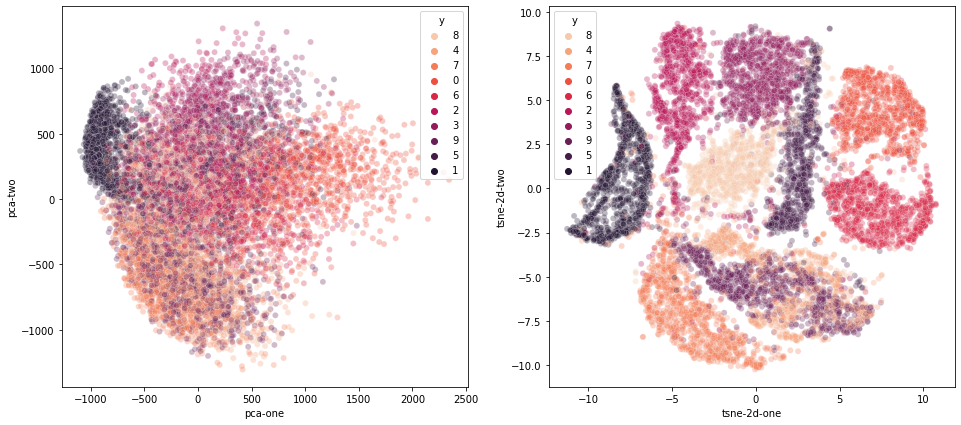

In [ ]:
plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("rocket_r", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("rocket_r", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)

In [ ]:
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(data_subset)
print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

Cumulative explained variation for 50 principal components: 0.8261610590761407


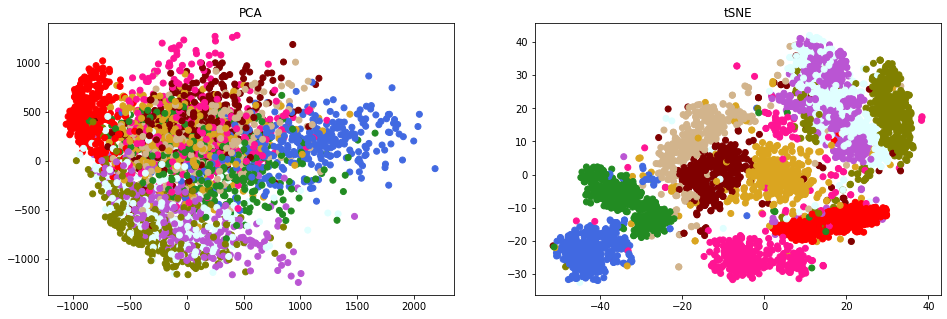

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.uint8)
X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.95)

pca = PCA(n_components=2)
X_PCA=pca.fit_transform(X_train)

tsne = TSNE(n_components=2,perplexity=100, random_state=42)
X_100 = tsne.fit_transform(X_train)

plt.figure(figsize=(16, 5))
ax1=plt.subplot(121)
plt.gca().set_title('PCA')
scatter=plt.scatter(X_PCA[:,0], X_PCA[:,1],c=vectorizer(y_train),label=colors)
ax2=plt.subplot(122)
plt.gca().set_title('tSNE')
plt.scatter(X_100[:,0], X_100[:,1],c=vectorizer(y_train),label=y_train)

###**Making Swiss Roll**

In [ ]:
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

###**Visualization**

Plotting the swiss roll on different axes

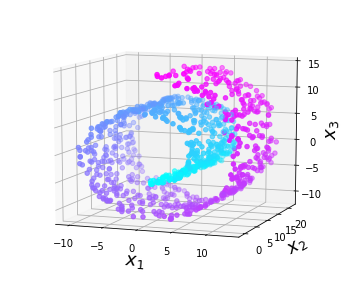

In [ ]:
axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.cool)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()

###**Comparison**

As we can notice the comparison below for PCA and T-sne with the components 2 

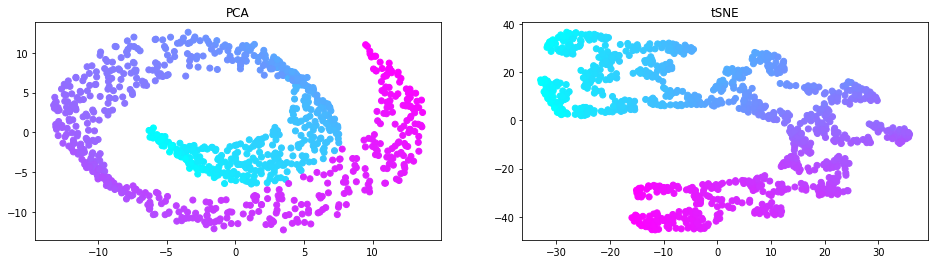

In [ ]:
pca = PCA(n_components=2)
X_PCA=pca.fit_transform(X)
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(16, 4))
plt.subplot(121)
plt.gca().set_title('PCA')
plt.scatter(X_PCA[:,0], X_PCA[:,1],c=t, cmap=plt.cm.cool)
plt.subplot(122)
plt.gca().set_title('tSNE')
plt.scatter(X_tsne[:,0], X_tsne[:,1],c=t, cmap=plt.cm.cool)

#**ISOMAP Dimensionality Reduction**

One place manifold learning is often used is in understanding the relationship between high-dimensional data points.
A common case of high-dimensional data is images: for example, a set of images with 1,000 pixels each can be thought of as a collection of points in 1,000 dimensions – the brightness of each pixel in each image defines the coordinate in that dimension.

Here let's apply Isomap on some digits data.

Running this command will download the data and cache it in your home directory for later use:

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
import sklearn.datasets
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
digits = load_digits(n_class=6)

In [ ]:
digits = load_digits(n_class=6)
X, y = digits.data, digits.target
n_samples, n_features = X.shape
n_neighbors = 30


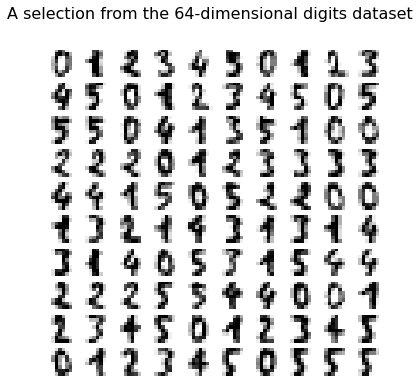

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(X[idx].reshape((8, 8)), cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("A selection from the 64-dimensional digits dataset", fontsize=16)

In [ ]:
def plotting_original(plt,digits):
    fig, ax = plt.subplots(8, 8, figsize=(10, 10))
    for i, axi in enumerate(ax.flat):
        axi.imshow(digits.images[i], cmap='binary')
        axi.set(xticks=[], yticks=[])

In [ ]:
def dimentional_reduction(X):
    from sklearn.manifold import Isomap
    dim_red = Isomap(n_components=2)
    X_transformed = dim_red.fit_transform(X)
    return X_transformed

In [ ]:
def feature_selection(X,y):
    from sklearn.feature_selection import SelectKBest
    from sklearn.feature_selection import chi2
    X_new = SelectKBest(chi2, k=2).fit_transform(X, y)
    return X_new,y

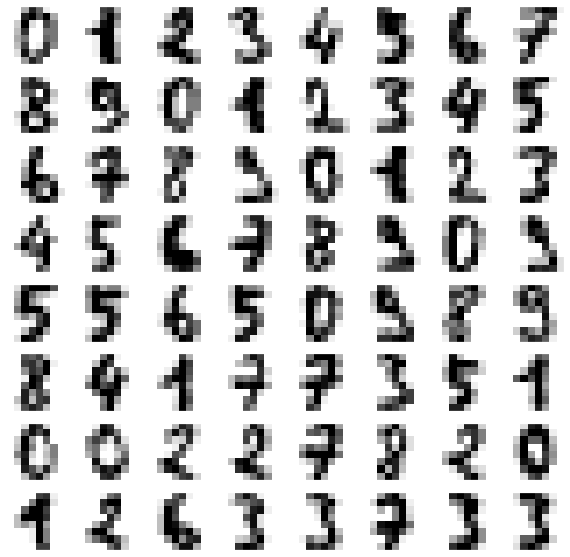

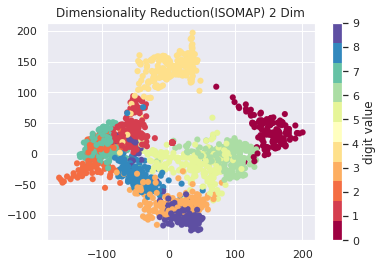

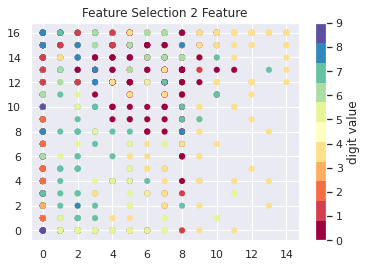

In [ ]:
def plotting(X_transformed,y,f,plt):
    if f=="dr":
        fdr = plt.figure()
        ax1 = fdr.add_subplot(111)
        plt.title("Dimensionality Reduction(ISOMAP) 2 Dim")

    elif f=="fs":
        ffs = plt.figure()
        ax2 = ffs.add_subplot(111)
        plt.title("Feature Selection 2 Feature")
  
    plt.scatter(X_transformed[:, 0], X_transformed[:, 1], lw=0.1,
       c=y, cmap=plt.cm.get_cmap('Spectral', 11))
   
    plt.colorbar(ticks=range(11), label='digit value')
    
def plotting_original(plt,digits):
    fig, ax = plt.subplots(8, 8, figsize=(10, 10))
    for i, axi in enumerate(ax.flat):
        axi.imshow(digits.images[i], cmap='binary')
        axi.set(xticks=[], yticks=[])
            
def dimentional_reduction(X):
    from sklearn.manifold import Isomap
    dim_red = Isomap(n_components=2)
    X_transformed = dim_red.fit_transform(X)
    return X_transformed

def feature_selection(X,y):
    from sklearn.feature_selection import SelectKBest
    from sklearn.feature_selection import chi2
    X_new = SelectKBest(chi2, k=2).fit_transform(X, y)
    return X_new,y
    
if __name__ == '__main__':
    import seaborn as sns; sns.set()
    from sklearn.datasets import load_digits
    import matplotlib.pyplot as plt
    digits = load_digits()
    X=digits.data
    y=digits.target
    plotting_original(plt,digits);
    X_rd=dimentional_reduction(X);
    plotting(X_rd,y,"dr",plt);
    X_fs,y_fs=feature_selection(X,y);
    plotting(X_fs,y_fs,"fs",plt);

In [ ]:
import numpy as np
from matplotlib import offsetbox
from sklearn.preprocessing import MinMaxScaler


def plot_embedding(X, title, ax):
    X = MinMaxScaler().fit_transform(X)

    shown_images = np.array([[1.0, 1.0]])  # just something big
    for i in range(X.shape[0]):
        # plot every digit on the embedding
        ax.text(
            X[i, 0],
            X[i, 1],
            str(y[i]),
            color=plt.cm.Dark2(y[i]),
            fontdict={"weight": "bold", "size": 9},
        )

        # show an annotation box for a group of digits
        dist = np.sum((X[i] - shown_images) ** 2, 1)
        if np.min(dist) < 4e-3:
            # don't show points that are too close
            continue
        shown_images = np.concatenate([shown_images, [X[i]]], axis=0)
        imagebox = offsetbox.AnnotationBbox(
            offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r), X[i]
        )
        ax.add_artist(imagebox)

    ax.set_title(title)
    ax.axis("off")

###**Comparison between different techniques. There are couple of things to note:**

The RandomTreesEmbedding is not technically a manifold embedding method, as it learn a high-dimensional representation on which we apply a dimensionality reduction method. However, it is often useful to cast a dataset into a representation in which the classes are linearly-separable.

The LinearDiscriminantAnalysis and the NeighborhoodComponentsAnalysis, are supervised dimensionality reduction method, i.e. they make use of the provided labels, contrary to other methods.

The TSNE is initialized with the embedding that is generated by PCA in this example. It ensures global stability of the embedding, i.e., the embedding does not depend on random initialization.

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomTreesEmbedding
from sklearn.manifold import (
    Isomap,
    LocallyLinearEmbedding,
    MDS,
    SpectralEmbedding,
    TSNE,
)
from sklearn.neighbors import NeighborhoodComponentsAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.random_projection import SparseRandomProjection

embeddings = {
    "Random projection embedding": SparseRandomProjection(
        n_components=2, random_state=42
    ),
    "Truncated SVD embedding": TruncatedSVD(n_components=2),
    "Linear Discriminant Analysis embedding": LinearDiscriminantAnalysis(
        n_components=2
    ),
    "Isomap embedding": Isomap(n_neighbors=n_neighbors, n_components=2),
    "Standard LLE embedding": LocallyLinearEmbedding(
        n_neighbors=n_neighbors, n_components=2, method="standard"
    ),
    "Modified LLE embedding": LocallyLinearEmbedding(
        n_neighbors=n_neighbors, n_components=2, method="modified"
    ),
    "Hessian LLE embedding": LocallyLinearEmbedding(
        n_neighbors=n_neighbors, n_components=2, method="hessian"
    ),
    "LTSA LLE embedding": LocallyLinearEmbedding(
        n_neighbors=n_neighbors, n_components=2, method="ltsa"
    ),
    "MDS embedding": MDS(n_components=2, n_init=1, max_iter=100),
    "Random Trees embedding": make_pipeline(
        RandomTreesEmbedding(n_estimators=200, max_depth=5, random_state=0),
        TruncatedSVD(n_components=2),
    ),
    "Spectral embedding": SpectralEmbedding(
        n_components=2, random_state=0, eigen_solver="arpack"
    ),
    "t-SNE embeedding": TSNE(
        n_components=2, init="pca", learning_rate="auto", random_state=0
    ),
    "NCA embedding": NeighborhoodComponentsAnalysis(
        n_components=2, init="random", random_state=0
    ),
}

In [ ]:
from time import time

projections, timing = {}, {}
for name, transformer in embeddings.items():
    if name.startswith("Linear Discriminant Analysis"):
        data = X.copy()
        data.flat[:: X.shape[1] + 1] += 0.01  # Make X invertible
    else:
        data = X

    print(f"Computing {name}...")
    start_time = time()
    #projections[name] = transformer.fit_transform(data, y)
    timing[name] = time() - start_time

Computing Random projection embedding...
Computing Truncated SVD embedding...
Computing Linear Discriminant Analysis embedding...
Computing Isomap embedding...
Computing Standard LLE embedding...
Computing Modified LLE embedding...
Computing Hessian LLE embedding...
Computing LTSA LLE embedding...
Computing MDS embedding...
Computing Random Trees embedding...
Computing Spectral embedding...
Computing t-SNE embeedding...
Computing NCA embedding...


**Plotting the resulting projection given by each method** 

**Found LLE does better than other flavors of the algorithm**

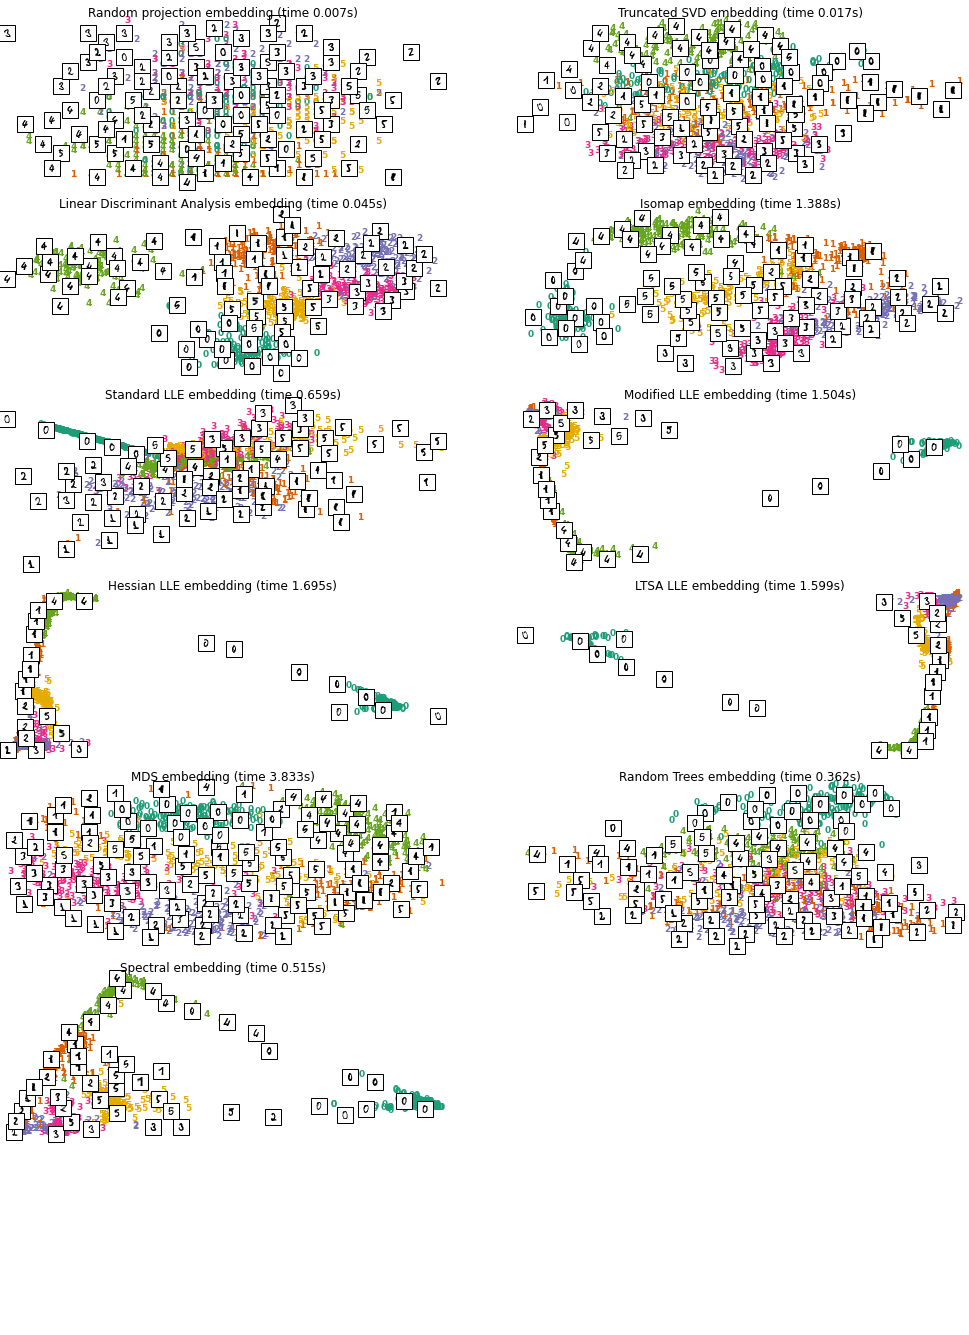

In [ ]:
from itertools import zip_longest

fig, axs = plt.subplots(nrows=7, ncols=2, figsize=(17, 24))

for name, ax in zip_longest(timing, axs.ravel()):
    if name is None:
        ax.axis("off")
        continue
    title = f"{name} (time {timing[name]:.3f}s)"

plt.show()

#**LLE Dimensionality Reduction**

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [ ]:
def make_hello(N=1000, rseed=42):
    # Make a plot with "HELLO" text; save as PNG
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)
    
    # Open this PNG and draw random points from it
    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    i, j = (X * data.shape).astype(int).T
    mask = (data[i, j] < 1)
    X = X[mask]
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]
    return X[np.argsort(X[:, 0])]

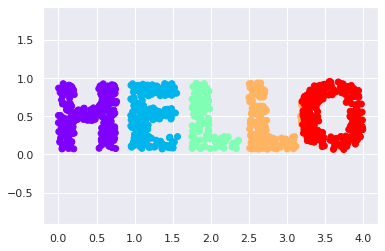

In [ ]:
X = make_hello(1000)
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))
plt.scatter(X[:, 0], X[:, 1], **colorize)
plt.axis('equal');

In [ ]:
def make_hello_s_curve(X):
    t = (X[:, 0] - 2) * 0.75 * np.pi
    x = np.sin(t)
    y = X[:, 1]
    z = np.sign(t) * (np.cos(t) - 1)
    return np.vstack((x, y, z)).T

XS = make_hello_s_curve(X)

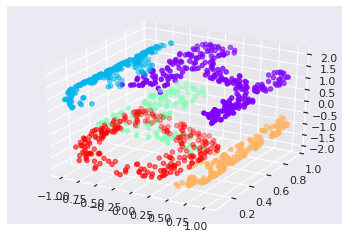

In [ ]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter3D(XS[:, 0], XS[:, 1], XS[:, 2],
             **colorize);

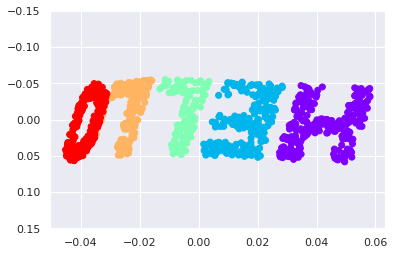

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding
model = LocallyLinearEmbedding(n_neighbors=100, n_components=2, method='modified',
                               eigen_solver='dense')
out = model.fit_transform(XS)

fig, ax = plt.subplots()
ax.scatter(out[:, 0], out[:, 1], **colorize)
ax.set_ylim(0.15, -0.15);

#**UMAP Dimensionality Reduction**

In [ ]:
!pip install scprep phate umap-learn

     |████████████████████████████████| 104 kB 5.0 MB/s 
     |████████████████████████████████| 86 kB 4.1 MB/s 
     |████████████████████████████████| 416 kB 39.1 MB/s 
     |████████████████████████████████| 45 kB 2.4 MB/s 
     |████████████████████████████████| 1.8 MB 33.9 MB/s 
     |████████████████████████████████| 1.1 MB 34.8 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=4931a6ffffa414ad39b5743702cef35ca3ce471821d7d9109436ac155fa7bb42
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=8c3cef27d08d893e3d1acf4bb703cc4204e1a4e753e43aaa46a1ce841c49c3d8
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


In [ ]:
import scprep
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

11501568/11490434 [==============================] - 0s 0us/step
MNIST Dataset Shape:
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


Sample #: 46244
MNIST Number: 5




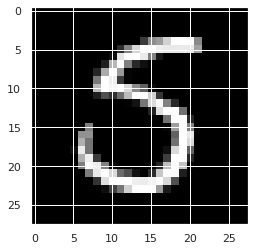

In [ ]:
# import the mnist digits using tensorflow
from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# display sample digits
# - import libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# - display data shapes
print('MNIST Dataset Shape:')
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(Y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(Y_test.shape))
print('\n')
# - randomly pick a sample image
# sample = np.random.randint(low=0, high=len(X_train))
# - pick a sample image
sample = 46244
print('Sample #: ' + str(sample))
print('MNIST Number: ' + str(Y_train[sample]))
print('\n')
image = X_train[sample]

# - plot the sample image
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

In [ ]:
# import the UMAP library
import umap

# create a UMAP reducer that will compress the data
reducer = umap.UMAP()

# get information about number of samples, rows, and columns in the dataset. 
# note the shape of each variable in the output above 
nsamples, nx, ny = X_train.shape

# reshape the data to comply with UMAP reducer requirements
X_train_2 = X_train.reshape((nsamples,nx*ny))

# create an embedding using the fit_transform function. 
embedding = reducer.fit_transform(X_train_2)

# display the embedding shape
print(np.shape(embedding))

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


(60000, 2)


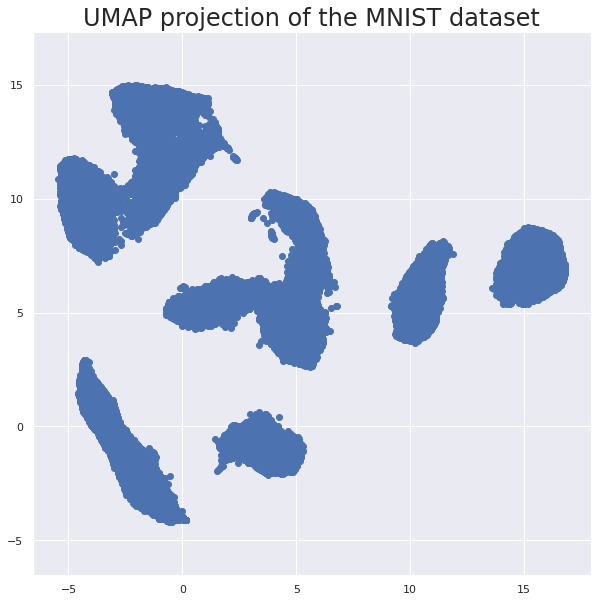

In [ ]:
import seaborn as sns

plt.figure(figsize=[10,10])
plt.scatter(
    embedding[:, 0],
    embedding[:, 1])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the MNIST dataset', fontsize=24)
plt.show()

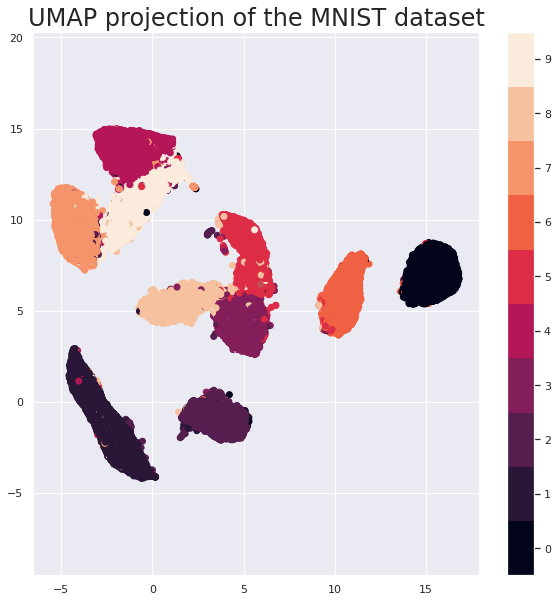

In [ ]:
import seaborn as sns

plt.figure(figsize=[10,10])
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=Y_train
)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the MNIST dataset', fontsize=24)
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.scatter(embedding[46244,0], embedding[46244,1],color='r')
plt.show()

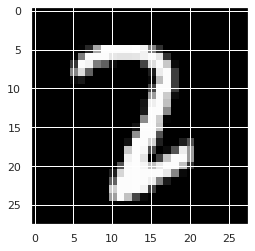

Expected value: 2


In [ ]:
# pick a random sample
sample = 4939

# - plot the sample image
fig = plt.figure
plt.imshow(X_test[sample], cmap='gray')
plt.show()

# print the expected numeric value
print('Expected value: ' + str(Y_test[sample]))

In [ ]:
# reshape the data to comply with UMAP reducer requirements
X_test_sample = X_test[sample].reshape((1,nx*ny))

# create an embedding using the fit_transform function. 
embedding_2 = reducer.transform(X_test_sample)

# display the embedding shape
print(np.shape(embedding_2))

(1, 2)


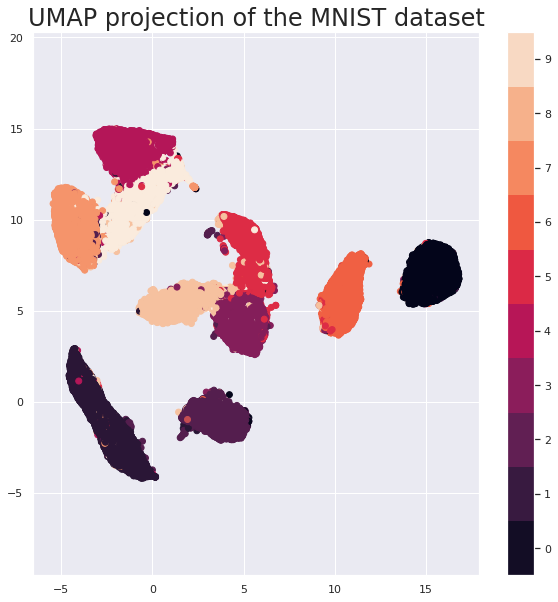

In [ ]:
# plot the training data and overlayed test sample
plt.figure(figsize=[10,10])
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=Y_train
)
plt.scatter(
    embedding_2[:, 0],
    embedding_2[:, 1],
    color='r'
)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the MNIST dataset', fontsize=24)
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.show()

In [ ]:
# create a UMAP reducer that will compress the data
reducer3D = umap.UMAP(n_components=3)

# get information about number of samples, rows, and columns in the dataset. 
# note the shape of each variable in the output above 
nsamples, nx, ny = X_train.shape

# reshape the data to comply with UMAP reducer requirements
X_train_2 = X_train.reshape((nsamples,nx*ny))

# create an embedding using the fit_transform function. 
embedding3D = reducer3D.fit_transform(X_train_2)

# display the embedding shape
print(np.shape(embedding3D))

(60000, 3)


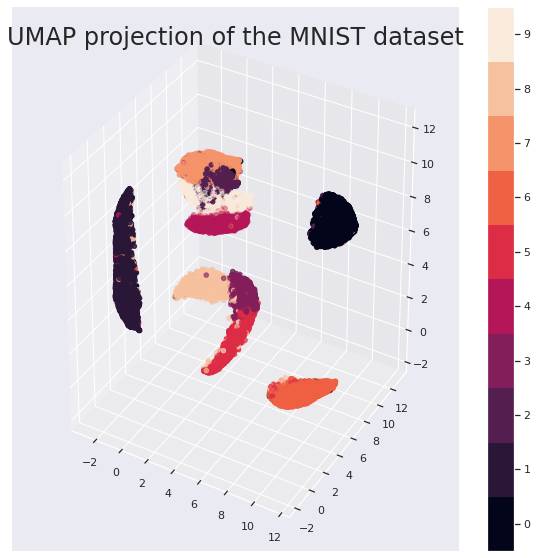

In [ ]:
fig = plt.figure(figsize=[10,10])
ax = plt.axes(projection ="3d")
p = ax.scatter(
    embedding3D[:, 0],
    embedding3D[:, 1],
    embedding3D[:, 2],
    c=Y_train
)
plt.title('UMAP projection of the MNIST dataset', fontsize=24)
fig.colorbar(p,boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.show()

#**Dimensionality Reduction on Tabular Data**

**Using iris dataset for performing different dimensionality reduction tecniques**

It includes three iris species with 50 samples and some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

Id, 
SepalLengthCm, 
SepalWidthCm, 
PetalLengthCm, 
PetalWidthCm, 
Species

###**Mounting and reading Iris dataset from the mounted Google Drive**

#**PCA**

###**Importing required libraries**

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [20]:
from google.colab import drive
drive.mount('/content/drive/')
df_iris_data = pd.read_csv('/content/drive/MyDrive/DataMining/Assignment2/Iris.csv')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [21]:
df_iris_data.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [22]:
df_iris_data.describe()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000

In [23]:
df_iris_data.shape

(150, 6)

In [24]:
X_variables = df_iris_data.iloc[:,1:5]
X_variables

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]

In [25]:
y_variable = df_iris_data.iloc[:,5]
y_variable

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [26]:
sc = StandardScaler()
transformed_df = sc.fit_transform(X_variables)

In [27]:
covariance_matrix = np.cov(transformed_df.T)

In [28]:

covariance_matrix

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

In [29]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [30]:
eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
print('Eigenvalues arranged in descending order:')
for i in eigen_pairs:
    print(i[0])

Eigenvalues arranged in descending order:
2.930353775589317
0.9274036215173428
0.14834222648163967
0.020746013995595967


In [31]:
pca = PCA()

In [32]:
pca = pca.fit(transformed_df)

In [33]:
explained_variance = pca.explained_variance_ratio_

In [34]:
explained_variance

array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

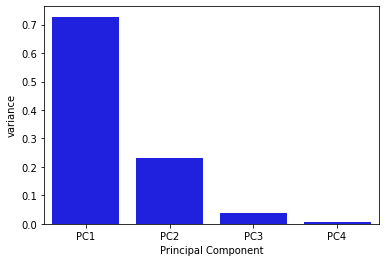

In [35]:
dataframe = pd.DataFrame({'variance':pca.explained_variance_ratio_,
             'Principal Component':['PC1','PC2','PC3','PC4']})
sns.barplot(x='Principal Component',y="variance", 
           data=dataframe, color="b");

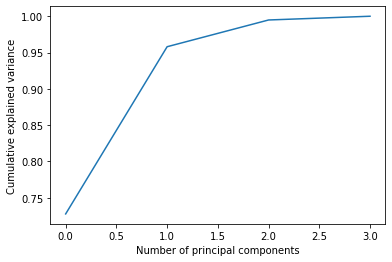

In [36]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [37]:
import time
start = time.time()
pca_2 = PCA(n_components =2 )
pca_2 = pca_2.fit(transformed_df)
pca_2d = pca_2.transform(X_variables)
print('Duration: {} seconds'.format(time.time() - start))

Duration: 0.0038361549377441406 seconds


In [38]:
df_iris_data['Species'] = df_iris_data['Species'].replace({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

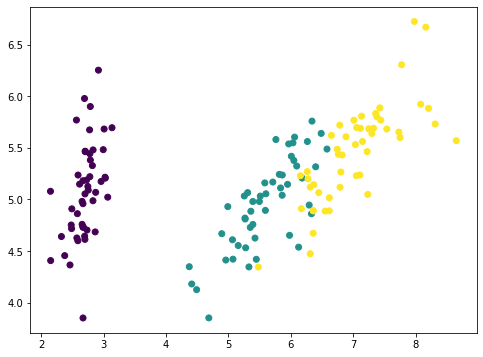

In [39]:
plt.figure(figsize=(8,6))

plt.scatter(pca_2d[:,0], pca_2d[:,1],c=df_iris_data['Species'])
plt.show()

In [ ]:
import time
start = time.time()
pca_4 = PCA(n_components =4 )
pca_4 = pca_4.fit(transformed_df)
pca_4d = pca_4.transform(X_variables)
print('Duration: {} seconds'.format(time.time() - start))

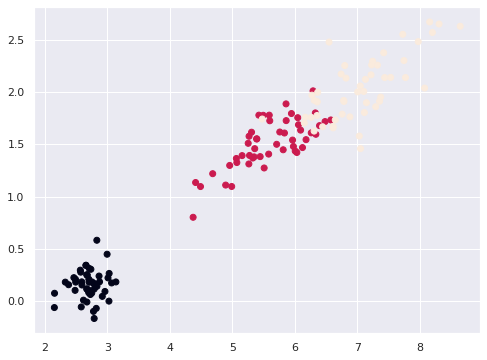

In [ ]:
plt.figure(figsize=(8,6))

plt.scatter(pca_4d[:,0], pca_4d[:,3],c=df_iris_data['Species'])
plt.show()

#**SVD**

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [11]:
from google.colab import drive
drive.mount('/content/drive/')
df_svd_data = pd.read_csv('/content/drive/MyDrive/DataMining/Assignment2/Iris.csv')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [12]:
df_svd_data.shape

(150, 6)

In [13]:
df_svd_data.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [14]:
encoder = LabelEncoder()

In [15]:
for col in df_svd_data.columns:
    df_svd_data[col] = encoder.fit_transform(df_svd_data[col])

In [16]:
X_variables = df_svd_data.iloc[:,1:5]
y_label = df_svd_data.iloc[:,5]

In [17]:
scaler = StandardScaler()
X_features = scaler.fit_transform(X_variables)

**Duration : 0.019 secs**

In [18]:
import time
start = time.time()
u, s, v = np.linalg.svd(X_features, full_matrices=True)
print('Duration: {} seconds'.format(time.time() - start))

Duration: 0.019496917724609375 seconds


In [ ]:
u.shape

(150, 150)

In [ ]:
s.shape

(4,)

In [ ]:
v.shape

(4, 4)

Text(0, 0.5, 'Percent of the variance explained')

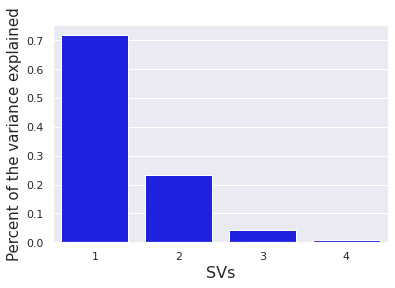

In [ ]:
variance_explained = np.round(s**2/np.sum(s**2), decimals=3)
variance_explained
 
sns.barplot(x=list(range(1,len(variance_explained)+1)),
            y=variance_explained, color="blue")
plt.xlabel('SVs', fontsize=16)
plt.ylabel('Percent of the variance explained', fontsize=15)

In [ ]:
col_labels= ['SV'+str(i) for i in range(1,3)]
svd_df = pd.DataFrame(u[:,0:2], index=y_label.tolist(), columns=col_labels)
svd_df=svd_df.reset_index()
svd_df.rename(columns={'index':'Class'}, inplace=True)
svd_df.head()

Class       SV1       SV2
0      0 -0.103073 -0.052278
1      0 -0.097213  0.047940
2      0 -0.110944  0.016190
3      0 -0.106858  0.037052
4      0 -0.108729 -0.068371

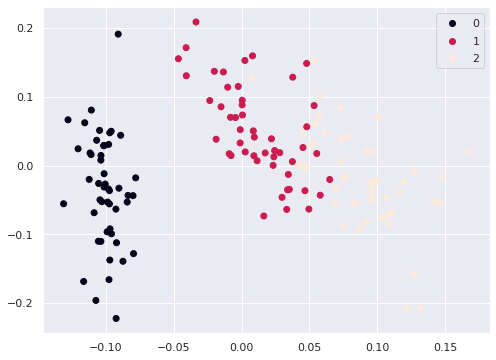

In [ ]:
plt.figure(figsize=(8,6))

scatter = plt.scatter(svd_df['SV1'],svd_df['SV2'],c=svd_df['Class'])
plt.legend(*scatter.legend_elements())

#**TSNE**

###**Importing required libraries**

In [7]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA


import sklearn.datasets
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [8]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [9]:
import time
start = time.time()
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)
print('Duration: {} seconds'.format(time.time() - start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 150 samples in 0.000s...
[t-SNE] Computed neighbors for 150 samples in 0.009s...
[t-SNE] Computed conditional probabilities for sample 150 / 150
[t-SNE] Mean sigma: 0.667454
[t-SNE] KL divergence after 250 iterations with early exaggeration: 93.694771
[t-SNE] KL divergence after 300 iterations: 2.137481
Duration: 0.8277320861816406 seconds


**Duration : 0.83 secs**

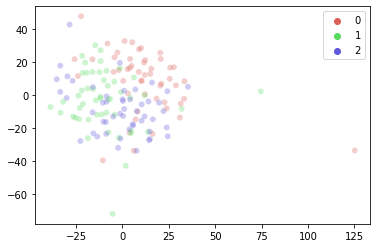

In [ ]:
tsne_1 = tsne_results[:,0]
tsne_2 = tsne_results[:,1]
#plt.figure(figsize=(16,10))
sns.scatterplot(
    x=tsne_1, y=tsne_2,
    hue=y,
    palette=sns.color_palette("hls", 3),
    data=X,
    legend="full",
    alpha=0.3
)



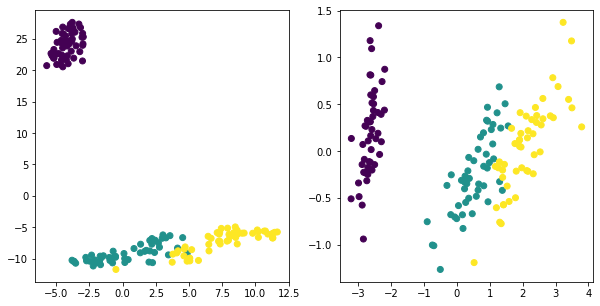

In [1]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
iris = load_iris()
X_tsne = TSNE(learning_rate=100).fit_transform(iris.data)
X_pca = PCA().fit_transform(iris.data)
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=iris.target)
plt.subplot(122)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=iris.target)

#**ISOMAP**

In [5]:
from sklearn import manifold, datasets

In [6]:
import time
start = time.time()
iris = datasets.load_iris()
isomap = manifold.Isomap(n_components=2)
new_dim = isomap.fit_transform(iris.data)
print('Duration: {} seconds'.format(time.time() - start))

Duration: 0.036664724349975586 seconds


**Duration : 0.037 secs**

In [ ]:
df = pd.DataFrame(new_dim, columns=['X', 'Y'])
df['label'] = iris.target
df.head()

X         Y  label
0  0.118155  0.381038      0
1  0.113729  0.323243      0
2  0.113922  0.325955      0
3  0.113904  0.325207      0
4  0.117613  0.372992      0

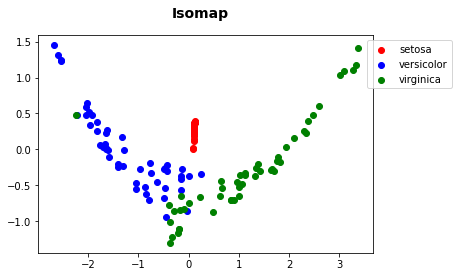

In [ ]:
fig = plt.figure()
fig.suptitle('Isomap', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)

plt.scatter(df[df.label == 0].X, df[df.label == 0].Y, color='red', label=iris.target_names[0])
plt.scatter(df[df.label == 1].X, df[df.label == 1].Y, color='blue', label=iris.target_names[1])
plt.scatter(df[df.label == 2].X, df[df.label == 2].Y, color='green', label=iris.target_names[2])

plt.legend(bbox_to_anchor=(1.25, 1))

#**LLE**

In [3]:
from sklearn.datasets import load_digits
from sklearn.manifold import LocallyLinearEmbedding
import time
start = time.time()
embedding = LocallyLinearEmbedding(n_components=2)
print('Duration: {} seconds'.format(time.time() - start))

Duration: 9.775161743164062e-05 seconds


**Duration : 9.77 secs**

In [ ]:
X_transformed = embedding.fit_transform(X)

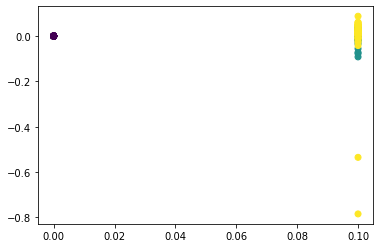

In [ ]:
scatter = plt.scatter(X_transformed.T[0], X_transformed.T[1],c=y)

#**UMAP**

In [ ]:
!pip install umap-learn

     |████████████████████████████████| 86 kB 3.1 MB/s 
     |████████████████████████████████| 1.1 MB 22.1 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=2540236210fb7d67ddcf3a1d544ed3396e430de0fb412fa9fca96ffa0d44bbbc
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=366e9130992710735128924819b82914a3caeaa0d34ecd0607ee99d0106732cc
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


In [ ]:
import umap
import time
start = time.time()
reducer = umap.UMAP(random_state=42,n_components=3)
embedding = reducer.fit_transform(X)
print('Duration: {} seconds'.format(time.time() - start))

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


Duration: 7.6239049434661865 seconds


**Duration : 7.62 secs**

In [ ]:
mapper = umap.UMAP().fit(X)

In [ ]:
!pip install "umap-learn[plot]"
import colorcet
import holoviews as hv
import sklearn.decomposition
import umap.plot

     |████████████████████████████████| 15.8 MB 601 bytes/s 
     |████████████████████████████████| 76 kB 5.5 MB/s 
     |████████████████████████████████| 793 kB 44.8 MB/s 
     |████████████████████████████████| 132 kB 46.5 MB/s 
     |████████████████████████████████| 793 kB 45.2 MB/s 
     |████████████████████████████████| 791 kB 53.6 MB/s 
     |████████████████████████████████| 786 kB 53.7 MB/s 
     |████████████████████████████████| 779 kB 56.8 MB/s 
     |████████████████████████████████| 778 kB 56.8 MB/s 
     |████████████████████████████████| 776 kB 43.6 MB/s 
     |████████████████████████████████| 769 kB 54.0 MB/s 
     |████████████████████████████████| 766 kB 43.5 MB/s 
     |████████████████████████████████| 1.0 MB 51.5 MB/s 
     |████████████████████████████████| 722 kB 57.6 MB/s 
     |████████████████████████████████| 722 kB 52.4 MB/s 
     |████████████████████████████████| 715 kB 54.2 MB/s 
     |████████████████████████████████| 705 kB 50.7 MB/s 
     |███████

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


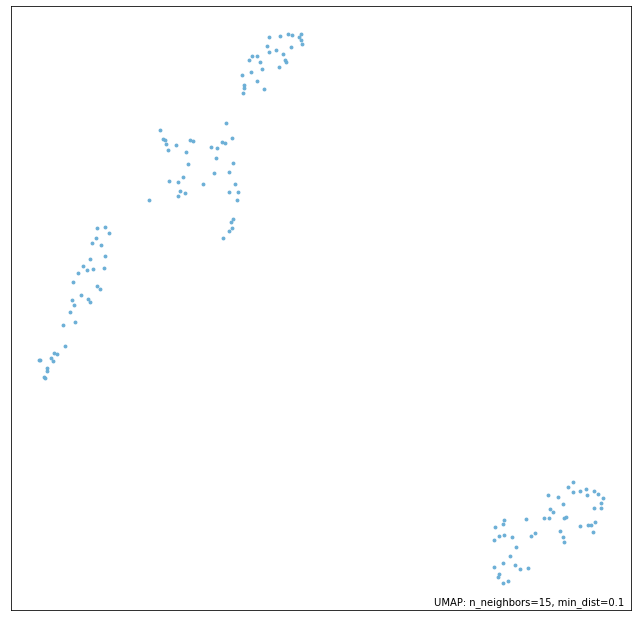

In [ ]:
umap.plot.points(mapper)

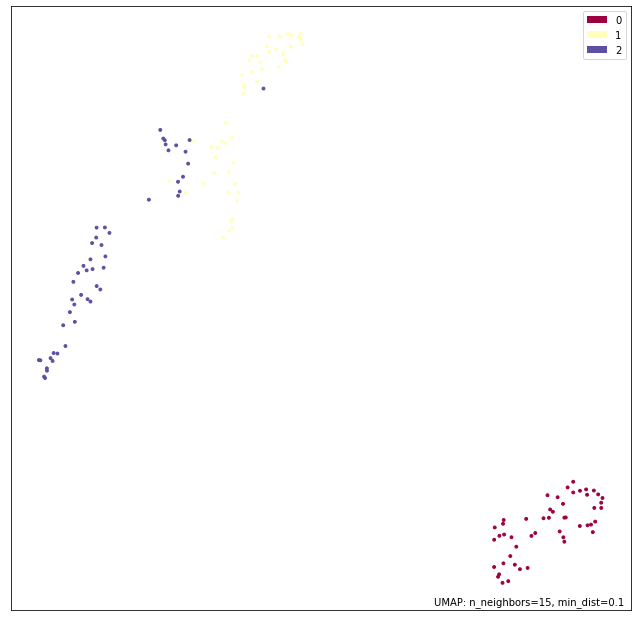

In [ ]:
umap.plot.points(mapper, labels=y)

#**Conclusion and Comparisons**

###**Computation Time**

The computation time for each of the technique are defined below. PCA takes the least computation time while t-SNE took the maximum computation time, but t-SNE has shown a better result when compared to PCA in visualizing the different patterns.

PCA - 0.30 secs

SVD - 0.20 secs

t-sne - 0.83 secs

UMAP - 7.63 secs

LLE - 9.8 secs

ISOMAP - .40 secs

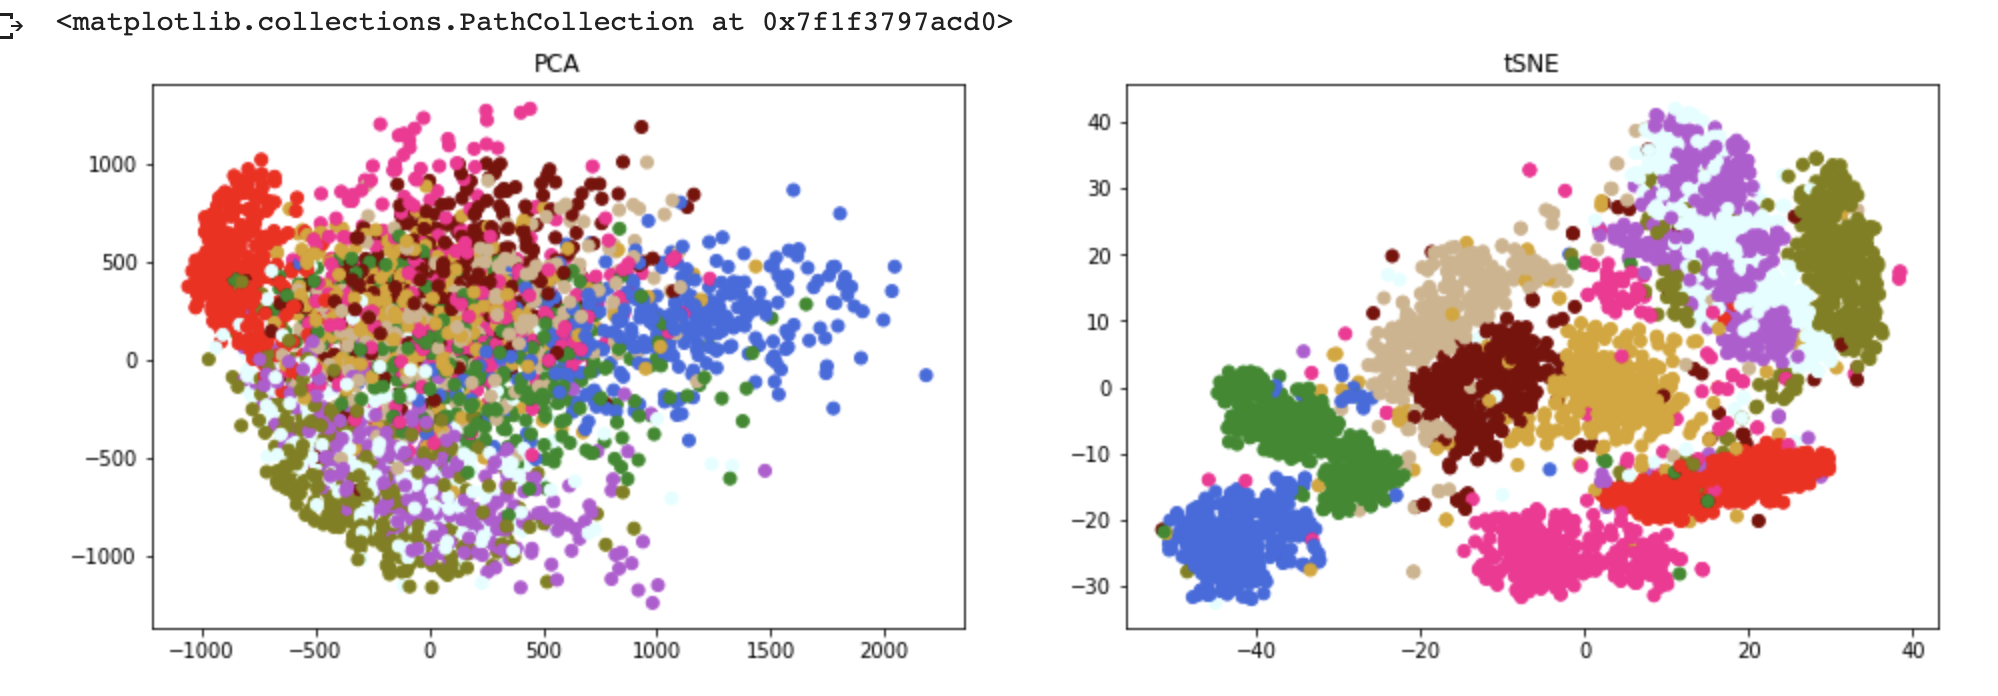

As per the above plot, we can clearly visualise that the cluster distribution is far better in tSNE compared to PCA

**As per the above observations, we come to the following conclusions and comparisons among the various techniques:**

PCA has not done a good job compared to other techniques. PCA is highly influenced by the outliers that is the main drawback of PCA.

From the graph we can see the two components definitely hold some information, especially for specific digits, but clearly not enough to set all of them apart.

Being linear, it fails to model the non linear relationships

SVD clearly shows how the reconstructed image quality varies with different values of K. As we increase or decrease the k with the slider, the quality increases or decreases.

t-SNE has done a better job when compared to the PCA in visualizing the different patterns of the clusters.t-SNE takes more of an extract approach and prioritizes the preservation of local distances by using probability and t-distributions. Compared to pCA, it is a probablistic technique but not mathematical. There are some limitation to the use of this technique as the computation is quite heavy. 

One of the recommendation says that we should apply another dimensionality reduction technique before using tSNE.Since t-SNE scales quadratically in the number of objects N, its applicability is limited to data sets with only a few thousand input objects; beyond that, learning becomes too slow to be practical. We can see that the digits are very clearly clustered in their own sub groups here.

UMAP outperformed t-SNE and PCA. The clusters are separated very well. For visualization purpose, UMAP shows the clusters, data points and the proximities in a very effective manner. The mini clusters are separated very well. UMAP is much faster than t-SNE. With t-SNE the problem is that it needs another dimensionality reduction method to perform well otherwise it takes a longe time to compute.

LLE performance was best among all the techniques. The computation time is less and also it provides the well- separated clusters that we were expecting.

Consideration of the non-linearity of the structure LLE goes beyond density modeling techniques such as local PCA. Density models do not provide a consistent set of global coordinates which embed the observations across the entire manifold; thus they cannot be used.Methods like Kernel PCA, Isomap are also unable to detect the features which are detected by LLE.

ISOMAP performed  better than PCA

Instead of measuring distance in pure Euclidean distance with the Pythagorean theorem, Isomap optimizes distances along a discovered manifold. 


**Displaying the comparison using tabular form**

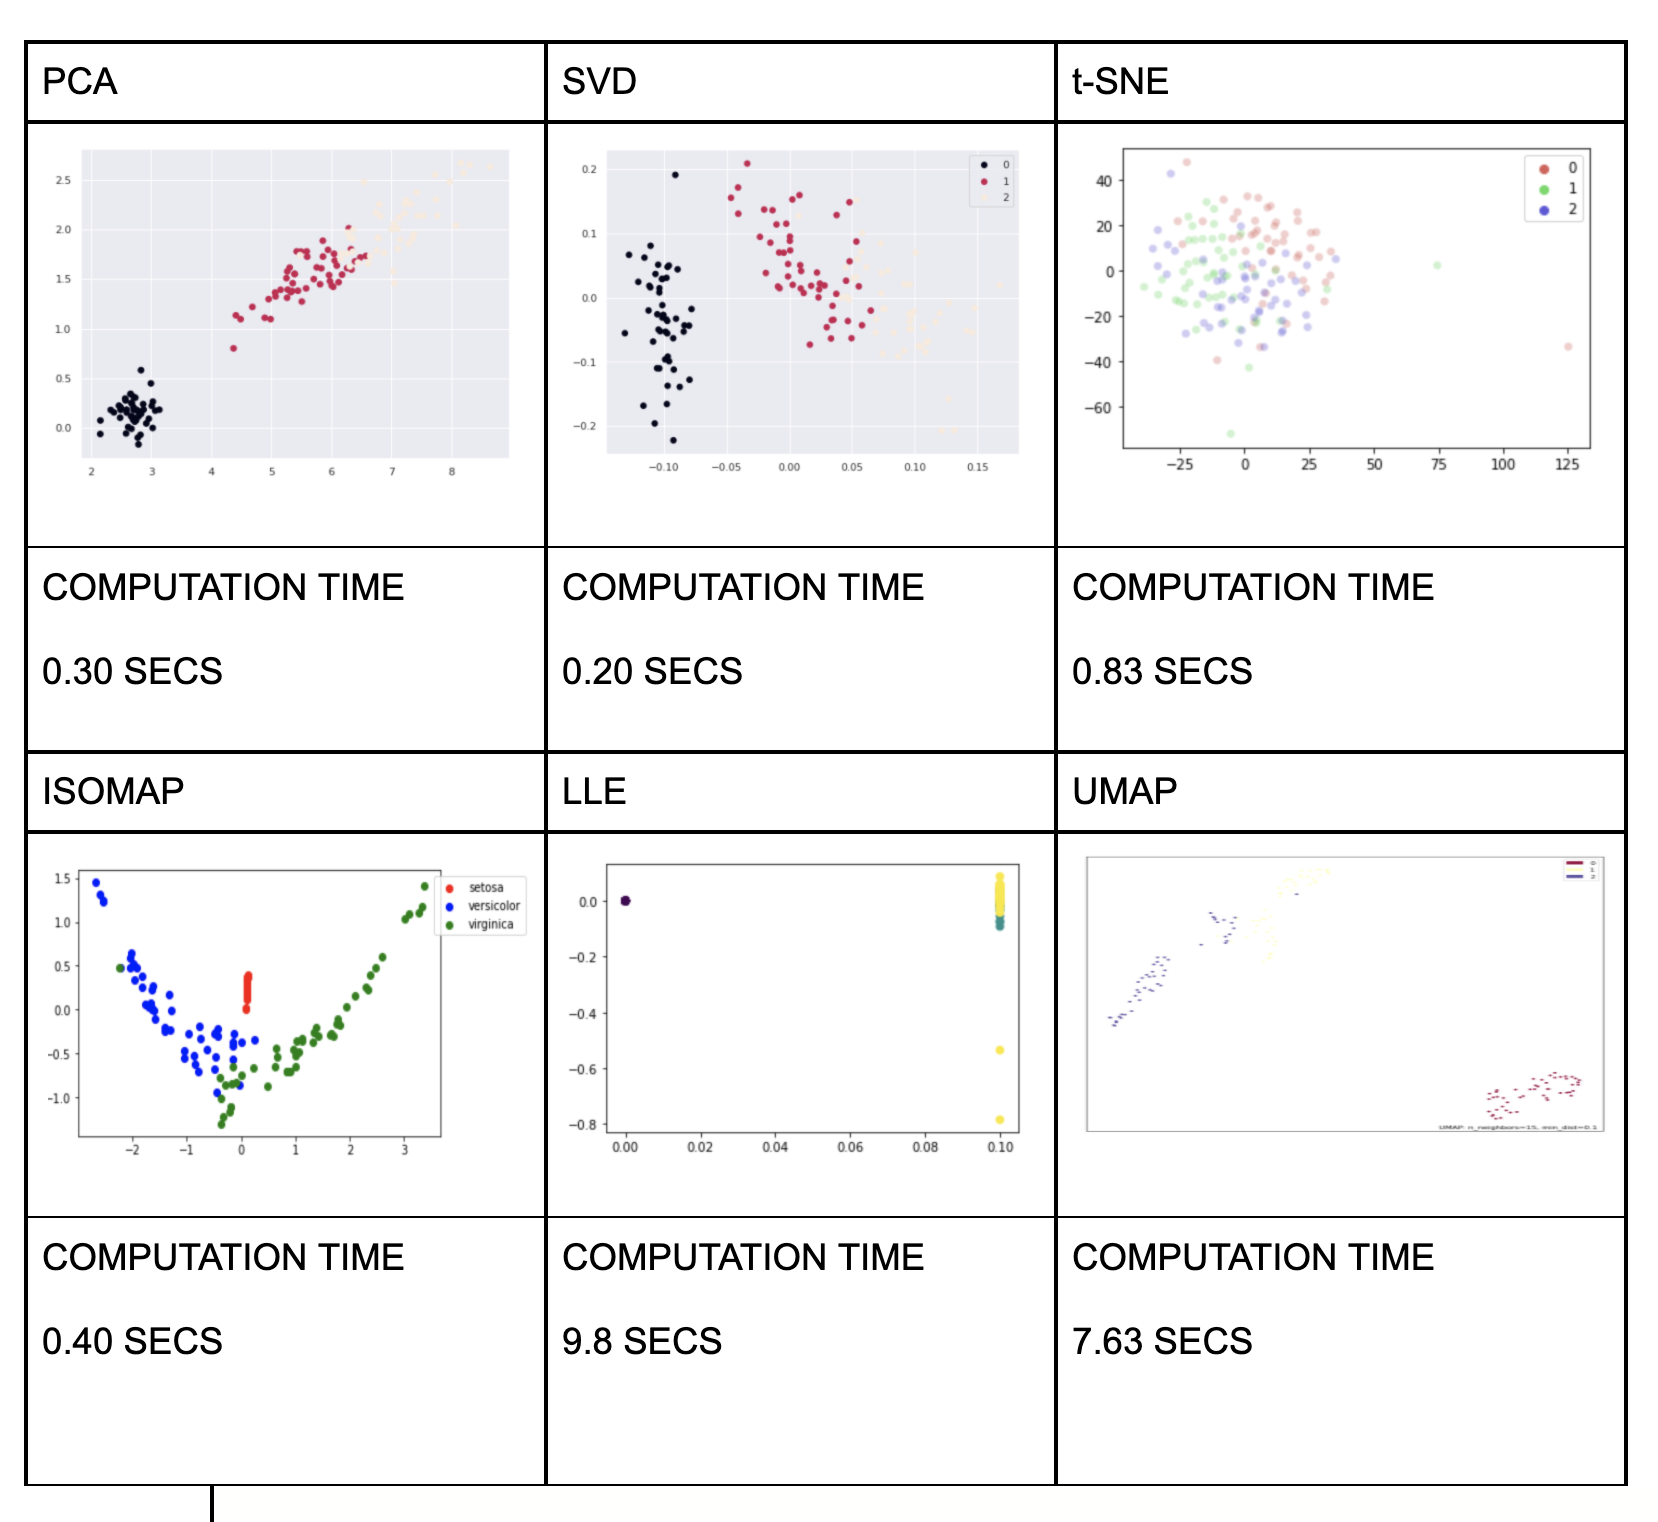